In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from queue import Queue
import random


In [173]:
x = np.array([[.697, .46], [.774, .376], [.634, .264], [.608, .318], 
              [.556, .215], [.403, .237], [.481, .149], [.437, .211], 
              [.666, .091], [.243, .267], [.245, .057], [.343, .099], 
              [.639, .161], [.657, .198], [.36, .37], [.593, .042], 
              [.719, .103],[.359, .188],[.339, .241], [.282, .257],
             [.748, .232], [.714, .346], [.483, .312], [.478, .437],
             [.525, .369],[.751, .489], [.532, .472], [.473, .376], [.725, .445], [.446, .459]])

In [213]:
class K_means:  #K均值聚类
    def __init__(self, data, cn = 3):
        
        self.data = data
        self.cen = np.zeros((cn,len(data[0]))) #储存簇中心向量
        self.cluster = np.zeros((len(data), 1)) #每个样本对应哪个簇
        self.cn = cn  #簇数
        self.cluster_group = {}  #储存各个簇中有哪些样本的数列
        for i in range(self.cn):
            self.cluster_group[i] = []
        
    def init_center(self):
        l = len(self.data)
        i = 0
        tool = [5,11,23]
        '''
        while i < self.cn:
            k = np.random.randint(l)
            if k not in tool:
                tool.append(k)
                i += 1
        '''
        for i, k in enumerate(tool):
            self.cen[i] = self.data[k]
            
    def dist_to_cen(self):
        d = np.zeros((len(self.data), self.cn))
        for i in range(len(self.data)):
            for j in range(self.cn):
                dist = np.sum(((self.data[i] - self.cen[j]) ** 2)) ** 0.5
                d[i, j] = dist
        return d
    
    def make_cluster(self):
        d = self.dist_to_cen()
        for i in range(len(self.data)):
            self.cluster[i] = np.argmin(d[i, :])
        for i in range(self.cn):
            for j, cluster in enumerate(self.cluster):
                if cluster == i:
                    self.cluster_group[i].append(j)
                    
        
    def update_center(self):
        for k, index in self.cluster_group.items():
            a = np.zeros((1,2))
            for v in index:
                a += self.data[v,:]
            self.cen[k] = a / len(index)
            
    def draw(self):
        fig, ax = plt.subplots(1, 1, figsize = (8,8))
        for k, index in self.cluster_group.items():
            if k == 0:
                ax.scatter([self.data[i,0] for i in index], [self.data[i,1] for i in index], color = 'r', label = 'C1')
            elif k == 1:
                ax.scatter([self.data[i,0] for i in index], [self.data[i,1] for i in index], color = 'b', label = 'C2')
            else:
                ax.scatter([self.data[i,0] for i in index], [self.data[i,1] for i in index], color = 'y', label = 'C3')

        ax.scatter([self.cen[i,0] for i in range(self.cn)], [self.cen[i,1] for i in range(self.cn)], marker = '+', color = 'k')
        ax.legend()
        plt.show()

    
    def excu(self, n):
        
        self.init_center()
        loop = 0
        
        while loop < n:
            
            for k, index in self.cluster_group.items():
                self.cluster_group[k] = []
            
            self.make_cluster()
            
            self.update_center()
            
            loop += 1
            
        self.draw()
            
        return self.cluster_group
                
        
            

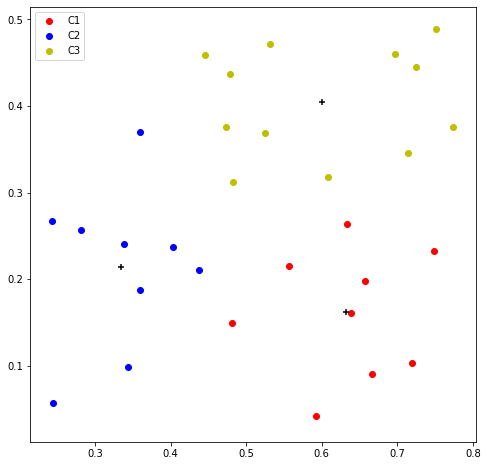

{0: [2, 4, 6, 8, 12, 13, 15, 16, 20],
 1: [5, 7, 9, 10, 11, 14, 17, 18, 19],
 2: [0, 1, 3, 21, 22, 23, 24, 25, 26, 27, 28, 29]}

In [214]:
watermelon = K_means(x, 3)
watermelon.excu(5)

In [211]:
class mixture_of_gaussian:   #高斯混合
    
    def __init__(self, data, cn = 3):
        self.data = data
        self.cn = cn
        self.mc = np.array([1 / cn for i in range(cn)]) #list of multi coefficient
        
        
        self.cov = np.zeros((cn, len(data[0]), len(data[0])))
        for i in range(cn):
            self.cov[i] = np.identity(len(data[0])) / 10
        
        self.gamma = np.zeros((len(data), cn))
        self.cluster_group = {}  #储存各个簇中有哪些样本的数列
        for i in range(self.cn):
            self.cluster_group[i] = []
            
        tool = [5,21,26]
        self.mean = np.zeros((cn, len(data[0])))
        '''
        while i < self.cn:
            k = np.random.randint(l)
            if k not in tool:
                tool.append(k)
                i += 1
        '''
        for i, k in enumerate(tool):
            self.mean[i] = data[k]
        
        
    def update_gamma(self):
        
        probability = np.zeros((len(self.data), self.cn))
        main = np.zeros((self.cn, len(self.data)))
        for i in range(self.cn):
            co = 1 / ((2 * math.pi)**(self.cn / 2) * np.linalg.det(self.cov[i])**0.5)
            for j in range(len(self.data)):
                index = self.data[j] - self.mean[i]
                #print(index)
                main = math.e**(-0.5 * np.dot(np.dot(index, np.linalg.inv(self.cov[i])), index.T))
                #print(main)
                probability[j,i] = co * main
                
            
        s = np.zeros((len(self.data), 1))
        for j in range(len(self.data)):
            s[j] = np.sum(self.mc * probability[j,:])
            
        for j in range(len(self.data)):
            self.gamma[j] = self.mc * probability[j, :] / s[j]
            
            
    def update_mean_cov_mc(self):
        for i in range(self.cn):
            s = np.zeros((len(self.data[0]), len(self.data[0])))
            k = np.array([self.gamma[j,i] * self.data[j] for j in range(len(self.data))])
            self.mean[i] = np.array([np.sum(k[:,0]), np.sum(k[:,1])]) / np.sum(self.gamma[:,i])
            
            for j in range(len(self.data)):
                diff = self.data[j] - self.mean[i]
                temp = np.multiply(diff , diff.reshape(diff.shape[0],1)) * self.gamma[j, i]
                s += temp
                
            self.cov[i] = s / np.sum(self.gamma[:,i])
            
                                       
            self.mc[i] = np.sum(self.gamma[:,i]) / len(self.data)
            
    def draw(self):
        fig, ax = plt.subplots(1, 1, figsize = (8,8))
        for k, index in self.cluster_group.items():
            if k == 0:
                ax.scatter([self.data[i,0] for i in index], [self.data[i,1] for i in index], color = 'r', label = 'C1')
            elif k == 1:
                ax.scatter([self.data[i,0] for i in index], [self.data[i,1] for i in index], color = 'b', label = 'C2')
            else:
                ax.scatter([self.data[i,0] for i in index], [self.data[i,1] for i in index], color = 'y', label = 'C3')

        ax.scatter([self.mean[i,0] for i in range(self.cn)], [self.mean[i,1] for i in range(self.cn)], marker = '+', color = 'k')

        ax.legend()
        plt.show()
            
           
        
    def excu(self, max_iter):
        i = 0
        while i < max_iter:
            self.update_gamma()
            self.update_mean_cov_mc()
            i += 1
            
            
        for j in range(len(self.data)):
            gamma = self.gamma[j]
            index = np.argmax(gamma)
            self.cluster_group[index].append(j)
        
        self.draw()
            
        return self.cluster_group
            
        
            

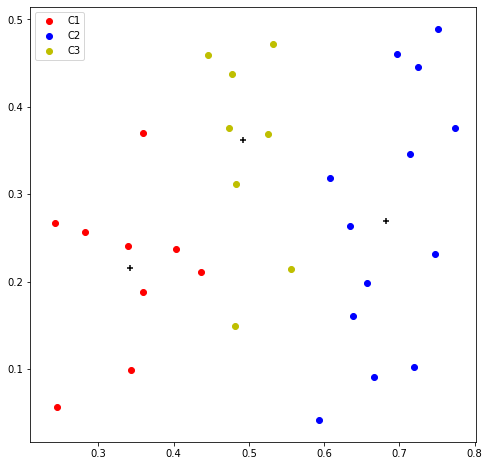

{0: [5, 7, 9, 10, 11, 14, 17, 18, 19],
 1: [0, 1, 2, 3, 8, 12, 13, 15, 16, 20, 21, 25, 28],
 2: [4, 6, 22, 23, 24, 26, 27, 29]}

In [212]:
wm = mixture_of_gaussian(x, 3)
wm.excu(50)

In [98]:
class DBSCAN:
    
    def __init__(self, data):
        self.data = data
        
        self.cluster_group = {}  #储存各个簇中有哪些样本的数列
        self.ep = 0.11
        self.minpts = 5
        
        self.field_group = []
        self.core_set = []
        self.remain = []

    def dist(self, x, y):
        dist = np.sum(((x - y) ** 2)) ** 0.5
        return dist
    
    def field(self, x):
        x_field = []
        for i in range(len(self.data)):
            if self.dist(x, self.data[i]) <= self.ep:
                x_field.append(i)
        return x_field
    
    def make_core_set(self):
        for i in range(len(self.data)):
            if len(self.field(self.data[i])) >= self.minpts:
                self.core_set.append(i)
                
                
                
    def excu(self):
        cn = 0

        self.make_core_set()
        self.remain = [i for i in range(len(self.data))] #[i for i in range(len(self.data)) if i not in self.core_set]
        
        while self.core_set != []:
            self.cluster_group[cn] = []
            remain = self.remain.copy()
            temp = random.sample(self.core_set, 1)[0]
            queue = Queue()
            queue.put(temp)
            self.remain.remove(temp)
            
            while not queue.empty():
                first = queue.get()
                if len(self.field(self.data[first])) >= self.minpts:
                    for i in self.field(self.data[first]):
                        if i in self.remain:
                            queue.put(i)
                            self.remain.remove(i)
                            
                    
            for i in remain:
                if i not in self.remain:
                    self.cluster_group[cn].append(i)
                    if i in self.core_set:
                        self.core_set.remove(i)
                    
            cn += 1
            
        self.cluster_group['noise'] = self.remain
            
        return self.cluster_group
            
            
            
            
                
                
        

In [102]:
wm2 = DBSCAN(x)
wm2.excu()

{0: [2, 3, 4, 6, 8, 12, 13, 15, 16, 20],
 1: [5, 7, 9, 11, 17, 18, 19, 22],
 2: [23, 24, 26, 27, 29],
 3: [0, 1, 21, 25, 28],
 'noise': [10, 14]}

In [180]:
class AGNES:
    
    def __init__(self, data):
        self.data = data
        self.cn = len(data)
        self.cluster_group = {}
        
    def dist(self, x, y):
        dist = np.sum(((x - y) ** 2)) ** 0.5
        return dist
    
    def max_dist(self, l1, l2):
        max_dist = 0
        for i in l1:
            for j in l2:
                if self.dist(self.data[i], self.data[j]) > max_dist:
                    max_dist = self.dist(self.data[i], self.data[j])
                    
        return max_dist
    
    def init_cluster_group(self):
        for i in range(self.cn):
            self.cluster_group[i] = [i]
    
    def update_dist_matrix(self):
        matrix = np.zeros((self.cn, self.cn))
        index = []
        min_matrix = 20000
        res = []
        for i in range(len(self.cluster_group)):
            for j in range(len(self.cluster_group)):
                matrix[i, j] = self.max_dist(self.cluster_group[i], self.cluster_group[j])
                if (i < j) & (matrix[i, j] < min_matrix):
                    min_matrix = matrix[i, j]
                    res = [i, j]
                 

        return matrix, res
    
    def excu(self, cn):
        self.init_cluster_group()
        
        while self.cn > cn:
            matrix = self.update_dist_matrix()[0]
            index = self.update_dist_matrix()[1]
            i = index[0]
            j = index[1]
            
            self.cluster_group[i] += self.cluster_group[j]
            for k in range(j, self.cn - 1):
                self.cluster_group[k] = self.cluster_group[k + 1]
                
            del self.cluster_group[self.cn - 1]
            
            self.cn -= 1
        
        return self.cluster_group
        
            
            
        
        

In [181]:
wm3 = AGNES(x)
wm3.excu(7)

{0: [0, 28, 25],
 1: [1, 21, 20, 2, 3],
 2: [4, 6],
 3: [5, 7, 17, 18, 9, 19, 14],
 4: [8, 16, 12, 13, 15],
 5: [10, 11],
 6: [22, 24, 27, 23, 29, 26]}